# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset

import statsmodels.formula.api as smf


In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


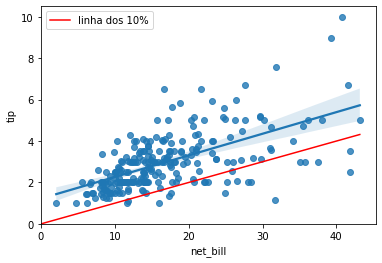

In [3]:
#Gráficos
sns.regplot(y='tip', x =('net_bill'), data = tips[tips['tip_pct']<0.5])

#gerando dados de linha de 10%
x= np.linspace(0,tips['net_bill'].max(),100)
y= 0.1*x

#plotando
plt.plot(x,y,'-r', label='linha dos 10%')

#opções estéticas para explicar o (0,0) no gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()

In [4]:
#Regressão
reg=smf.ols('tip ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 02 May 2022   Prob (F-statistic):           5.02e-23
Time:                        14:01:52   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
#Predição de Dados
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [6]:
reg.predict(dados_novos)

0    2.918050
1    2.192915
2    3.070031
3    3.354125
4    3.414719
dtype: float64

In [7]:
reg.params

Intercept    1.330698
net_bill     0.099334
dtype: float64

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

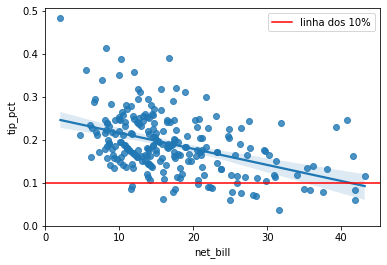

In [21]:
#Gráficos
sns.regplot(y='tip_pct', x =('net_bill'), data = tips[tips['tip_pct']<0.5])

#gerando dados de linha de 10%
#x= np.linspace(0,tips['net_bill'].max(),100)
#x= np.linspace(0,(0.1.max()),100)

#y= 0.1*x

#plotando
#plt.plot(x,y,'-r', label='linha dos 10%')
plt.axhline(y = 0.1, color = 'r', linestyle = '-',label='linha dos 10%') 

#opções estéticas para explicar o (0,0) no gráfico
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.legend()

In [22]:
reg=smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.52e-06
Time:                        15:24:15   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
#Predição de Dados
dados_novos = tips[0:5]
dados_novos

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [24]:
reg.predict(dados_novos)

0    0.207087
1    0.251951
2    0.197684
3    0.180107
4    0.176358
dtype: float64

In [25]:
reg.params

Intercept    0.305297
net_bill    -0.006146
dtype: float64

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Em valor absoluto percebemos que quanto maior o valor da "Net Bill" maior será a "tip", porém quando olhamos o valor percentual a curva se inverte. Quanto maior o valor da "net bill", menor é o valor percentual da gorjeta, ou seja, no primeiro caso temos uma curva crescente, no segundo caso uma curva decrescente. Sim, aparentemente o primeiro caso parece responder melhor os resultados da nossa regressão, o R2 varia de de 0 à 1, e quanto maior explica de melhor forma o resultado.

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

# Exercício 4.1

In [29]:

reg.predict(dados_novos)
reg.fittedvalues

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

# Exercício 4.2

In [35]:
reg=smf.ols('tip ~ net_bill + tip_pct', data = tips).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.92e-39
Time:                        16:13:55   Log-Likelihood:                -334.69
No. Observations:                 244   AIC:                             675.4
Df Residuals:                     241   BIC:                             685.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1477      0.187      0.790      0.430      -0.220       0.516
net_bill       0.1231      0.008     15.315      0.000       0.107       0.139
tip_pct        3.8751      0.395      9.803      0.000       3.096       4.654
==============================================================================
Omnibus:                       30.078   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.867
Skew:                          -0.094   Prob(JB):                     1.76e-38
Kurtosis:                       7.131   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
reg.fittedvalues

0      2.360495
1      1.957671
2      3.078562
3      3.285872
4      3.398096
         ...   
239    3.986286
240    3.556334
241    3.068089
242    2.548647
243    2.827649
Length: 244, dtype: float64

# Exercício 4.3 - já foi calculado no item 2 (Summary)

In [37]:
reg.rsquared

0.5228056660862083

# Exercício 4.4

O R2 do modelo 4.2 com "net bill" e "tip pct" explica muito melhor o modelo de regressão, ou seja, obtivemos um valor mais aproximado do tip.